In [2]:
### Grading script code 
### You don't need to read this, proceed to the next cell
import sys
import functools
ipython = get_ipython()

def set_traceback(val):
    method_name = "showtraceback"
    setattr(
        ipython,
        method_name,
        functools.partial(
            getattr(ipython, method_name),
            exception_only=(not val)
        )
    )

class AnswerError(Exception):
  def __init__(self, message):
    pass

def exec_test(f, question):
    try:
        f()
        print(question + " Pass")
    except:
        set_traceback(False) # do not remove
        raise AnswerError(question + " Fail")

# Week 2 Problem Set

## Homeworks

**HW1.** *Min-Heap:* Write the following function to implement *min-heap*. A *min-heap* is a binary heap that satisfies the *min-heap property*. This property can be described as:

    For all nodes except the root:
    
    A[left(i)] >= A[i]
    A[right(i)] >= A[i]

- `min_child(heap, index)`: which returns the index of the node's smallest child. The node you are referring has index of value `index`
- `min_heapify(array, index, size)`: which moves the node at `index` down the tree so as to satisfy the *min-heap property*. The argument `index` is the index of the node you want to start moving down in the array. The argument `size` is the size of the heap. This size may be the same or less than the number of elements in the array. Hint: You may need the `min_child()` function.
- `build_min_heap(array)`: which build a *min-heap* from an arbitrary array of integers. This function should make use of `min_heapify(array, index)`. 

In [3]:
# Copy over the implementations of left_of & right_of from the Cohort qns
def left_of(index):
    return index * 2 + 1

def right_of(index):
    return (index + 1) * 2

In [4]:
def min_child(heap, index):
    r_child = right_of(index)
    l_child = left_of(index)
    if r_child >= len(heap):
        return l_child
    elif heap[r_child] > heap[l_child]:
        return l_child
    else:
        return r_child
        

In [5]:
minheap = [1, 2, 4, 3, 9, 7, 8, 10, 14, 16]
assert min_child(minheap, 0) == 1
assert min_child(minheap, 2) == 5
assert min_child(minheap, 3) == 7
assert min_child(minheap, 1) == 3

In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [7]:
def min_heapify(array, index, size):
    if index * 2 > size - 2:
        return array
    min_i = min_child(array, index)
    if array[min_i] > array[index]:
        return array
    else:
        array[min_i], array[index] = array[index], array[min_i]
        return min_heapify(array, min_i, size)
    

    

    
        

In [8]:
array = [1, 3, 4, 2, 9, 7, 8, 10, 14, 16]
min_heapify(array, 1, len(array))
assert array == [1, 2, 4, 3, 9, 7, 8, 10, 14, 16]

In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [10]:
def build_min_heap(array):
    size = len(array)
    for i in range(size//2 - 1, -1, -1):
        min_heapify(array, i, size)
    return array

In [11]:
array = [16, 14, 10, 8, 7, 9, 3, 2, 4, 1]
build_min_heap(array)
print(array)
assert array == [1, 2, 3, 4, 7, 9, 10, 8, 16, 14]

[1, 2, 3, 4, 7, 9, 10, 8, 16, 14]


In [12]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW2.** *Heapsort:* Implement heapsort that makes use of *min-heap* instead of *max-heap*. This function returns a *new* array. The strategy is similar to max-heap, but we will use a new array to store the sorted output. Take note of the hints below:
- The top of the min-heap is always the smallest. You can take this element and put it into the output array.
- To find the next minimum, take the last element of the heap and put it into the first element of the array. Now, the tree is no longer a min-heap. Use `min_heapify()` to restore the min-heap property. This will result in a mean-heap where the first element of the array is the next minimum. You can then take out the top of the min-heap and put it into the output array.
- Reduce the heap size as you go.
- Return the new output array.

In [13]:
import random

def gen_random_int(number, seed):
    ls = [i for i in range(number)]
    random.shuffle(ls, random.seed(seed))
    return ls

In [14]:
def heapsort(array):
    result = []
    build_min_heap(array)
    while array:
        result.append(array.pop(0))
        build_min_heap(array)
    return result

In [15]:
array = gen_random_int(10, 100)
result = heapsort(array)
print(result)
assert result == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [16]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW3.** Compute the computational time for Heap Sort algorithm implemented in Python for various number of inputs. Make use of `gen_random_int(n)` to generate the input array. Use the template below to generate computation time for different number of inputs: 10, 100, 1000, etc.

In [18]:
import time
import random

def run_function(f, x):
    start = time.time()
    f(x)
    end = time.time()
    return end-start

def gen_random_int(number, seed):
    ls = [i for i in range(number)]
    random.shuffle(ls, random.seed(seed))
    return ls

time_heapsort = []
# set the maximum power for 10^power number of inputs
maxpower = 4

for n in range(1, maxpower + 1):
    # create array for 10^1, 10^2, etc 
    # use seed 100
    array = gen_random_int(10**n, 100)
    
    # call run_function with heapsort and array as arguments
    # result = run_function(None, None)
    result = run_function(heapsort, array)
    ###
    ### YOUR CODE HERE
    ###
    
    time_heapsort.append(result)

print(time_heapsort)

[0.0, 0.0009970664978027344, 0.1467912197113037, 14.289087295532227]


**HW4.** Plot the output of HW3 by first calculating a new x-axis computed as $n\log_2(n)$. Use the template below.

Reference:
- [Numpy Log2 function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log2.html)

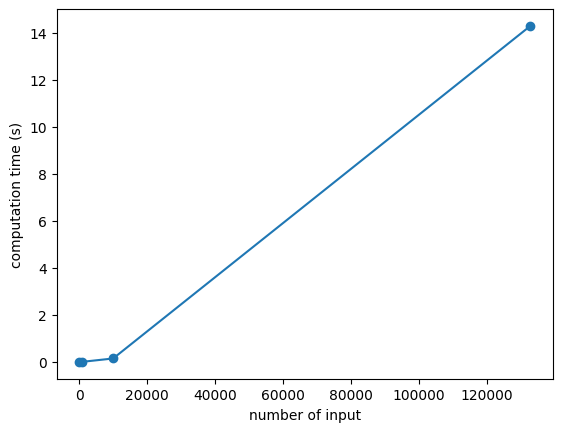

In [19]:
import matplotlib.pyplot as plt
import numpy as np

maxpower = 4
# create an iterable from 1 to maxpowers
powers = range(1, maxpower + 1)
# variable n stores the number of items to sort
n = []

# Create a list of n for our x axis
for exp in powers:
    n.append(10**exp)

# convert to Numpy array
n = np.array(n)

# calculate n*log(n) for x axis 
x = n * np.log2(n)
plt.plot(x, time_heapsort, "-o")
plt.xlabel("number of input")
plt.ylabel("computation time (s)")
plt.show()